#Part 1

In [ ]:
import pandas as pd
import numpy as np
from random import sample
import random

<div dir="rtl">
בחרנו בשלושת המשתנים המסבירים הבאים: גיל (age), מספר השכלה  (educational-num) מתאר את רמת ההשכלה של אדם בסט הנתונים בין 1-16 ורווחי הון (capital-gain).
עבור המשתנה המוסבר בחרנו במספר שעות העבודה השבועיות(hours-per-week) .

</div>

##1


<div dir="rtl">
1.
שאלת המחקר שלנו האם יש קשר בין הגיל של אדם, רמת השכלתו ומצבו ורווחי ההון שלו למספר שעות העבודה השבועיות שלו.

</div>

###1.a

In [ ]:
df=pd.read_csv('adult.csv')
sample = df.sample(n=200, random_state=42)
sample_test=sample
sample_test['x0'] = 1
X = sample_test[['x0','age', 'educational-num', 'capital-gain']]
y = sample_test['hours-per-week'].to_numpy()
# 1.a
beta_cova = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
C=np.linalg.inv(np.dot(X.T, X))
y_cova=np.dot(X,beta_cova)
sigma_square_epsilon=np.sum((y-y_cova)**2)/len(y)
se_vector=[]
for i in range(len(beta_cova)):
  se_vector.append(np.sqrt(sigma_square_epsilon*C[i][i]))
for i, b in enumerate(beta_cova):
  print("CI for beta",i ,"is",(b-2*se_vector[i],b+2*se_vector[i]))


CI for beta 0 is (31.679999720097157, 48.23408637882771)
CI for beta 1 is (-0.05956179955879476, 0.20609847923094532)
CI for beta 2 is (-0.8097934622636868, 0.4761840672419465)
CI for beta 3 is (-0.00022839501808004007, 0.0002330166265691284)


In [ ]:
beta_cova

array([ 3.99570430e+01,  7.32683398e-02, -1.66804698e-01,  2.31080424e-06])

###1.b,c,d

In [ ]:
from sklearn.utils import resample
# 1.b,c,d
def is_in_CI(CI, estimator):
  return estimator<=CI[1] and estimator>=CI[0]


df_test=df
df_test['x0'] = 1
X = df_test[['x0','age', 'educational-num', 'capital-gain']]
y = df_test['hours-per-week'].to_numpy()
beta_cova_all_data = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)   


B=400
n=np.shape(sample)[0]
bootsCoef=[]
for i in range(B):
  resampled_data = df.sample(n, replace=True)
  resampled_data['x0'] = 1
  X = resampled_data[['x0','age', 'educational-num', 'capital-gain']]
  y = resampled_data['hours-per-week'].to_numpy()
  beta_cova = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
  bootsCoef.append(beta_cova)
se_list=[]  
beta_i_list=[]
lenghtNormalCI=[]
lengthPivotalCI=[]
lengthQuantileCI=[]
is_in_NormalCI_list=[]
is_in_PivotalCI_list=[]
is_in_QuantileCI_list=[]
for i in range(len(beta_cova)):
  beta=[]
  for k in range(len(bootsCoef)):
    beta.append(bootsCoef[k][i])
  std = np.std(beta)
  se = std / np.sqrt(n)
  NormalApproxCI=(beta_cova[i]-2*se,beta_cova[i]+2*se)
  PivotalCI=(2*beta_cova[i]-np.quantile(beta,0.975),2*beta_cova[i]-np.quantile(beta,0.025))
  QuantileCI=(np.quantile(beta,0.025),np.quantile(beta,0.975))
  lenghtNormalCI.append(NormalApproxCI[1]-NormalApproxCI[0])
  lengthPivotalCI.append(PivotalCI[1]-PivotalCI[0])
  lengthQuantileCI.append(QuantileCI[1]-QuantileCI[0])
  is_in_NormalCI_list.append(is_in_CI(NormalApproxCI,beta_cova_all_data[i]))
  is_in_PivotalCI_list.append(is_in_CI(PivotalCI,beta_cova_all_data[i]))
  is_in_QuantileCI_list.append(is_in_CI(QuantileCI,beta_cova_all_data[i]))

  print("Noraml approximation CI for beta",i,": ",f'{NormalApproxCI}')
  print("Pivotal CI for for beta",i,"         : ", f'{PivotalCI}')
  print("quantile CI for beta",i,"          : ", f'{QuantileCI}')

Noraml approximation CI for beta 0 :  (31.784162621804924, 33.103203115193836)
Pivotal CI for for beta 0          :  (24.24776110518735, 42.63835041708941)
quantile CI for beta 0           :  (22.249015319909347, 40.63960463181141)
Noraml approximation CI for beta 1 :  (-0.015955106039329092, 0.0052344265160924434)
Pivotal CI for for beta 1          :  (-0.21664299855417876, 0.08505420763681662)
quantile CI for beta 1           :  (-0.09577488716005327, 0.2059223190309421)
Noraml approximation CI for beta 2 :  (0.7837914928323647, 0.8844708677409708)
Pivotal CI for for beta 2          :  (0.3704801959100532, 1.796696416436909)
quantile CI for beta 2           :  (-0.12843405586357357, 1.2977821646632823)
Noraml approximation CI for beta 3 :  (-0.0004574345754096637, -0.00037911619753157544)
Pivotal CI for for beta 3          :  (-0.0016504352053417649, -0.0005133242538649843)
quantile CI for beta 3           :  (-0.0003232265190762549, 0.0008138844324005257)


##2

In [ ]:
# 2
df_test=df
df_test['x0'] = 1
X = df_test[['x0','age', 'educational-num', 'capital-gain']]
y = df_test['hours-per-week'].to_numpy()
beta_cova_all_data = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 


for i in range(len(beta_cova)):
  print("length of beta",i,"Ci is  for the normal model is",lenghtNormalCI[i])
  print("is beta",i," estimator is in the CI? answer:",is_in_NormalCI_list[i])
  print("length of beta",i,"Ci is  for the pivotal model is",lengthPivotalCI[i])
  print("is beta",i," estimator is in the CI? answer:",is_in_PivotalCI_list[i])
  print("length of beta",i,"Ci is  for the quantile model is",lengthQuantileCI[i])
  print("is beta",i," estimator is in the CI? answer:",is_in_QuantileCI_list[i])


length of beta 0 Ci is  for the normal model is 1.3190404933889113
is beta 0  estimator is in the CI? answer: False
length of beta 0 Ci is  for the pivotal model is 18.390589311902062
is beta 0  estimator is in the CI? answer: True
length of beta 0 Ci is  for the quantile model is 18.390589311902062
is beta 0  estimator is in the CI? answer: True
length of beta 1 Ci is  for the normal model is 0.021189532555421536
is beta 1  estimator is in the CI? answer: False
length of beta 1 Ci is  for the pivotal model is 0.3016972061909954
is beta 1  estimator is in the CI? answer: True
length of beta 1 Ci is  for the quantile model is 0.3016972061909954
is beta 1  estimator is in the CI? answer: True
length of beta 2 Ci is  for the normal model is 0.10067937490860612
is beta 2  estimator is in the CI? answer: False
length of beta 2 Ci is  for the pivotal model is 1.4262162205268558
is beta 2  estimator is in the CI? answer: True
length of beta 2 Ci is  for the quantile model is 1.426216220526855

##3

###3.a

In [ ]:
# 3.a
df_without_firstSample= df.drop(sample.index)
sample2=df_without_firstSample.sample(n=100, random_state=42)
sample_test2=sample2
sample_test2['x0'] = 1
X = sample_test2[['x0','age', 'educational-num', 'capital-gain']]
y_true = sample_test2['hours-per-week'].to_numpy()
n=100
y_predicted_list=[]
for i in range(100):
  y_pred=np.dot(beta_cova ,X.iloc[i].to_numpy())
  y_predicted_list.append(y_pred)
  print("the prediction for record",i,"is", y_pred)


the prediction for record 0 is 39.84901703560864
the prediction for record 1 is 37.97170142433219
the prediction for record 2 is 40.54913972185485
the prediction for record 3 is 40.64026549780236
the prediction for record 4 is 40.61346379899427
the prediction for record 5 is 40.54913972185485
the prediction for record 6 is 43.09977632056942
the prediction for record 7 is 39.800773977754076
the prediction for record 8 is 40.59738277970941
the prediction for record 9 is 36.28199770471238
the prediction for record 10 is 39.709648201806566
the prediction for record 11 is 42.97112816629058
the prediction for record 12 is 39.763251599422745
the prediction for record 13 is 43.01937122414515
the prediction for record 14 is 40.67778787613369
the prediction for record 15 is 38.13251161718074
the prediction for record 16 is 42.96576782652896
the prediction for record 17 is 43.12657801937751
the prediction for record 18 is 38.09062658722982
the prediction for record 19 is 38.07354787980294
the pre

###3.b

In [ ]:
# 3.b
from statistics import mean
from scipy.stats import norm
B=400
X = sample_test2[['x0','age', 'educational-num', 'capital-gain']]
y = sample_test2['hours-per-week'].to_numpy()
n=np.shape(sample2)[0]
sigma_list=[]
boot_C_list=[]
list_of_100C=[]
list_of100_pred=[]
Confidence_interval_list=[]
se_list=[]
beta_cova =np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
y_cova_new=np.dot(beta_cova ,X.T)
sigma_square_epsilon=np.sum((y-y_cova_new)**2)/len(y)
C=np.linalg.inv(np.dot(X.T, X))
for i in range(100):
  bootsY=[]
  y_cova_new=np.dot(beta_cova ,X.iloc[i].to_numpy())
  for k in range(B):
      resampled_data = sample2.sample(n, replace=True)
      resampled_data['x0'] = 1
      X = resampled_data[['x0','age', 'educational-num', 'capital-gain']]
      y = resampled_data['hours-per-week'].to_numpy()
      beta_cova_boot = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
      y_pred=np.dot(beta_cova_boot ,X.iloc[i].to_numpy())
      bootsY.append(y_pred)
  se=np.sqrt(sigma_square_epsilon*np.dot(X.iloc[i].to_numpy(),np.dot(C,X.iloc[i].to_numpy().T)))
  CI=(np.mean(bootsY)-norm.ppf(0.975)*se,np.mean(bootsY)+norm.ppf(0.975)*se)
  Confidence_interval_list.append(CI)
  print("CI for record",i,"is: ",CI)


CI for record 0 is:  (35.20659491284598, 47.52420467773232)
CI for record 1 is:  (37.43563433411801, 44.70525448420514)
CI for record 2 is:  (34.91118306832294, 47.77439975676634)
CI for record 3 is:  (36.85801549722295, 46.00995103369702)
CI for record 4 is:  (36.04394215562654, 46.221845012644096)
CI for record 5 is:  (36.040564431129994, 46.348976434591364)
CI for record 6 is:  (36.37433925857481, 46.118412917676565)
CI for record 7 is:  (34.84005414509616, 47.40517176210123)
CI for record 8 is:  (35.271454438554585, 46.57295009687712)
CI for record 9 is:  (35.26284218776246, 47.37338078698869)
CI for record 10 is:  (37.08314095976086, 45.68707266117932)
CI for record 11 is:  (35.261294895096086, 47.57890465998243)
CI for record 12 is:  (35.963907836467975, 46.47994340009178)
CI for record 13 is:  (37.250369473703, 44.78817484061946)
CI for record 14 is:  (34.95626538336994, 47.06680398259617)
CI for record 15 is:  (36.55737276534506, 46.05912239037301)
CI for record 16 is:  (35.818

###3.c

In [ ]:
# 3.c
counter=0
for i in range(100):
  if is_in_CI(Confidence_interval_list[i],y_predicted_list[i]):
    counter+=1
print("the precentage of estimators that were on the CI is:",counter,"%")

the precentage of estimators that were on the CI is: 91 %


###3.d


<div dir="rtl">
ראינו בתרגול 5 שאלה 1 :
</div>


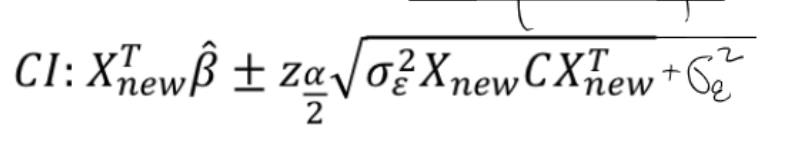


<div dir="rtl">
 אז כדי למצוא רווח סמך לתצפית חדשה במקום לתוחלת שלה הייתנו מחשבים בבוסטראפ את  סיגמא אפסילון ובכך היינו מקבלים אומד לשונות שהיה נראה כך:
</div>


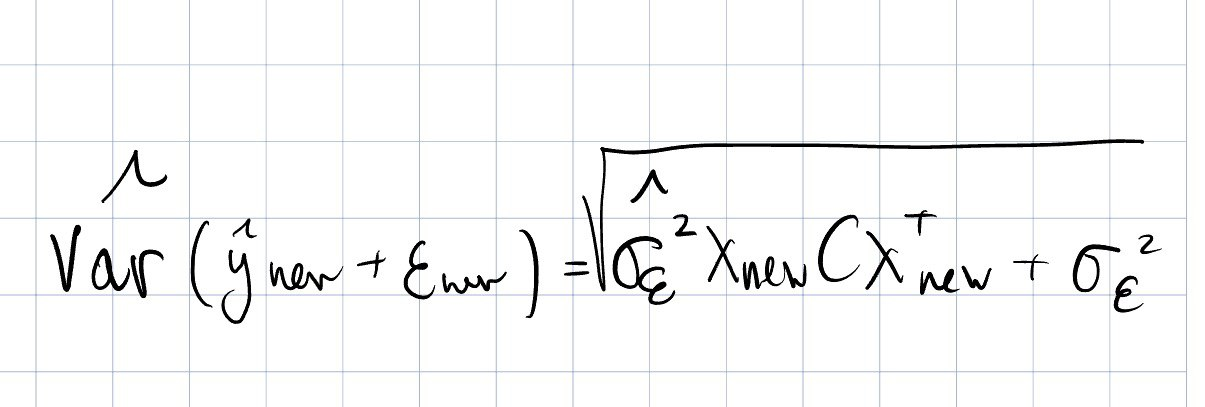


<div dir="rtl">
ואת האומד הנל לשונות היינו מציבים בנוסחה של רווח הסמך
</div>

#Part 2


<div dir="rtl">
1.שאלת המחקר שלנו היא:
האם מספר שעות העבודה של אדם בשבוע של אדם המרויח פחות מ50K דולרים בשנה  יותר קטן ממספר שעות העבודה של אדם המרוויח  50K דולרים ויותר

המשתנה הרציף הינו X=hours-per-week

המשתנה הבינארי הינו y=income
</div>

##2,3

###2

In [ ]:
# 2
sample3 = df.sample(n=200, random_state=41)


###3.a

In [ ]:
# transforming the data so it will be suitable for logistig regression
# 0 is for  aperson whoe eran under 50K
# 1 ids for over 50K
# 3.a
sample_transform =sample3[['hours-per-week','income']].copy()
sample_transform["income"] = sample_transform["income"].replace({"<=50K": 0, ">50K": 1})
df_less50k=sample_transform[sample_transform["income"]==0]
df_more50k=sample_transform[sample_transform["income"]==1]
mu1=df_less50k["hours-per-week"].mean()
mu2=df_more50k["hours-per-week"].mean()
delta=mu2-mu1
print("mu1=",mu1)
print("mu2=",mu2)
print("delta=",delta)

mu1= 37.836879432624116
mu2= 47.389830508474574
delta= 9.552951075850459


<div dir="rtl">
זהו אומד נראות מירבית משום שלפי חוק המספרים הגדולים ההמוצע מתכנס לתוחלת 
</div>

###3.b

In [ ]:
from scipy.stats import t, norm

n1=np.shape(df_less50k)[0]
n2=np.shape(df_more50k)[0]
std1=np.std(df_less50k["hours-per-week"])
std2=np.std(df_more50k["hours-per-week"])
df = n1 + n2 - 2
t_value = t.ppf(0.95, df)

CI=(delta-t_value*np.sqrt((std1**2)/n1+(std2**2)/n2),delta+t_value*np.sqrt((std1**2)/n1+(std2**2)/n2))
print("CI for delta is:",CI)

CI for delta is: (6.421971604115862, 12.683930547585055)


###3.c

In [ ]:
data = df[['hours-per-week','income']].copy()
data["income"] = data["income"].replace({"<=50K": 0, ">50K": 1})
df_less50k_all_data=data[data["income"]==0]
df_more50k_all_data=data[data["income"]==1]
mu1=df_less50k_all_data["hours-per-week"].mean()
mu2=df_more50k_all_data["hours-per-week"].mean()
delta=mu2-mu1
print("mu1=",mu1)
print("mu2=",mu2)
print("delta=",delta)

mu1= 38.84004844570045
mu2= 45.45289638059382
delta= 6.612847934893374


 <div dir="rtl">
 קיבלנו שהאומד לדלתא על סמך כל הנתונים נמצא ברווח הסמך
</div>

###3.d

In [ ]:
# 3.d
# wald test
T = (mu2 - mu1) / np.sqrt((std1 ** 2)/n1 + (std2 ** 2)/n2)

print("Wald test: ")
print('H0: more50k_mean - les50k_mean = 0')
print('H1: more50k_mean - les50k_mean >0')
print('T.S: T=', T)
print('R.R: T < z(0.025) ')

if T >= norm.ppf(0.975) :
    print('-----Reject H0-----')
else:
    print('-----Accept H0-----')
    
p_value_wald = 2 * norm.cdf(-np.abs(T))



Wald test: 
H0: more50k_mean - les50k_mean = 0
H1: more50k_mean - les50k_mean >0
T.S: T= 3.4903769204123214
R.R: T < z(0.025) 
-----Reject H0-----


In [ ]:
# # permutation test
from scipy.stats import ranksums
Diffmean= sample_transform[sample_transform["income"]==1]["hours-per-week"].mean()- sample_transform[sample_transform["income"]==0]["hours-per-week"].mean()

observations=sample_transform[["income","hours-per-week"]]
# define y as records with income=1, x as records  with income =0
B=400
observations = observations.sort_values("hours-per-week", ascending=True)
counter=0
observations['rank'] = observations['hours-per-week'].rank(method='average')
observations = observations.reset_index(drop=True)
df_more50k=observations[observations["income"]==1]
n=np.shape(df_more50k)[0]
m=np.shape(df_less50k)[0]
N=m+n
W_s=np.sum(df_more50k["rank"])
E_Ws=(n*(N+1))/2
t= W_s-E_Ws
for i in range(B):
  sample = observations.sample(frac=n/N, replace=False)
  df_more50k=sample[sample["income"]==1]
  more50k_mean=np.mean(df_more50k["hours-per-week"])
  df_less50k=sample[sample["income"]==0]
  less50k_mean=np.mean(df_less50k["hours-per-week"])
  delta_sample=more50k_mean-less50k_mean
  # print(delta_sample)
  if (delta_sample)>=Diffmean:
    counter+=1
p_value=(1/B)*counter
    
print('H0: more50k_mean - les50k_mean = 0')
print('H1: more50k_mean - les50k_mean >0')
print('T.S: p_value=', p_value)
print('R.R: p_value < 0.05 ')

if p_value < 0.05 :
    print('-----Reject H0-----')
else:
    print('-----Accept H0-----')



H0: more50k_mean - les50k_mean = 0
H1: more50k_mean - les50k_mean >0
T.S: p_value= 0.4875
R.R: p_value < 0.05 
-----Accept H0-----


##4

###4.a

In [ ]:
# 4
m1= np.quantile(df_less50k["hours-per-week"],0.5)
m2= np.quantile(df_more50k["hours-per-week"],0.5)
delta=m2-m1
print("m1=",m1)
print("m2=",m2)
print("delta=",delta)

m1= 40.0
m2= 40.0
delta= 0.0


<div  dir="rtl">
זהו אינו אומד נראות מירבית.
</div>

###4.b

In [ ]:
SE = np.sqrt(std1**22/n1 + std2**2/n2)


B=400
n1=np.shape(df_less50k)[0]
n2=np.shape(df_more50k)[0]
bootsCoef=[]
diffMedian=[]
for i in range(B):
  resampled_data1 = df_less50k.sample(n1, replace=True)
  resampled_data2 = df_more50k.sample(n2, replace=True)
  m1=np.quantile(resampled_data1["hours-per-week"],0.5)
  m2=np.quantile(resampled_data2["hours-per-week"],0.5)
  diffMedian.append(m2-m1)
# we chose to show 3 ways of calculating CI
std = np.std(diffMedian)
se = std / np.sqrt(n)
NormalApproxCI=(delta-2*se,delta+2*se)
PivotalCI=(2*delta-np.quantile(diffMedian,0.975),2*delta-np.quantile(diffMedian,0.025))
QuantileCI=(np.quantile(diffMedian,0.025),np.quantile(diffMedian,0.975))
print("the normal aprox Ci of the diffrence of the medians is:",NormalApproxCI)
print("the Pivotal Ci of the diffrence of the medians is:",PivotalCI)
print("the Quantile Ci of the diffrence of the medians is:",QuantileCI)

the normal aprox Ci of the diffrence of the medians is: (-0.6228827698012318, 0.6228827698012318)
the Pivotal Ci of the diffrence of the medians is: (-8.049999999999955, 0.0)
the Quantile Ci of the diffrence of the medians is: (0.0, 8.049999999999955)


###4.c

In [ ]:
data = df[['hours-per-week','income']].copy()
data["income"] = data["income"].replace({"<=50K": 0, ">50K": 1})
df_less50k_all_data=data[data["income"]==0]
df_more50k_all_data=data[data["income"]==1]
m1= np.quantile(df_less50k_all_data["hours-per-week"],0.5)
m2= np.quantile(df_more50k_all_data["hours-per-week"],0.5)
delta=m2-m1
print("m1=",m1)
print("m2=",m2)
print("delta=",delta)

m1= 40.0
m2= 40.0
delta= 0.0


<div dir="rtl">
האומד על סמך כל הנתונים נמצא ברווח הסמך
</div>

###4.d

In [ ]:
# permutation '
# # permutation test
from scipy.stats import ranksums
Diffmean= sample_transform[sample_transform["income"]==1]["hours-per-week"].median()- sample_transform[sample_transform["income"]==0]["hours-per-week"].median()

observations=sample_transform[["income","hours-per-week"]]
# define y as records with income=1, x as records  with income =0
B=400
observations = observations.sort_values("hours-per-week", ascending=True)
counter=0
observations['rank'] = observations['hours-per-week'].rank(method='average')
observations = observations.reset_index(drop=True)
df_more50k=observations[observations["income"]==1]
n=np.shape(df_more50k)[0]
m=np.shape(df_less50k)[0]
N=m+n
for i in range(B):
  sample = observations.sample(frac=n/N, replace=False)
  df_more50k=sample[sample["income"]==1]
  more50k_median=np.median(df_more50k["hours-per-week"])
  df_less50k=sample[sample["income"]==0]
  less50k_median=np.median(df_less50k["hours-per-week"])
  delta_sample=more50k_median-less50k_median
  # print(delta_sample)
  if (delta_sample)>=Diffmean:
    counter+=1
p_value=(1/B)*counter
p_value

    
print('H0: more50k_mean - les50k_mean = 0')
print('H1: more50k_mean - les50k_mean >0')
print('T.S: p_value=', p_value)
print('R.R: p_value < 0.05 ')

if p_value < 0.05 :
    print('-----Reject H0-----')
else:
    print('-----Accept H0-----')



H0: more50k_mean - les50k_mean = 0
H1: more50k_mean - les50k_mean >0
T.S: p_value= 0.5175
R.R: p_value < 0.05 
-----Accept H0-----


###4.e

<div dir="rtl">
לא ניתן להשתמש במבחן וולד כי הוא מטפל  במבחן בקבוצה אחת ולנו יש 2 קבוצות

לגבי מבחן t  הוא דורש סטטיסטי כגון תוחלת שבמקרה הנורמלי או האסימפטוטי היינו יכולים להשיג באמצעות הממוצע אבל כעת יש לנו הפרש חציונים שאיתם אנחנו לא יכולים לעשות זאת.
</div>

##5

In [ ]:
# permutaion
# check if normal
# if yes check with sampling
from scipy.stats import ranksums
observations=sample_transform[["income","hours-per-week"]]
# de
B=400
observations = observations.sort_values("hours-per-week", ascending=True)
counter=0
observations['rank'] = observations['hours-per-week'].rank(method='average')
observations = observations.reset_index(drop=True)
df_more50k=observations[observations["income"]==1]
n=np.shape(df_more50k)[0]
m=np.shape(df_less50k)[0]
N=m+n
W_s=np.sum(df_more50k["rank"])
E_Ws=(n*(N+1))/2
var_Ws=(m*n*(N+1))/12

var_Ws=(m*n*(N+1))/12
T_S=(W_s-E_Ws)/np.sqrt(var_Ws)
print("Wilcoxon test: ")
print('H0: Fx=Fy')
print('H1: Fx < Fy')
print('T.S: =', T_S)
print('R.R: W >= z(0.925) ')

if T_S >= norm.ppf(0.975):
    print('-----Reject H0-----')
else:
    print('-----Accept H0-----')
  

Wilcoxon test: 
H0: Fx=Fy
H1: Fx < Fy
T.S: = 13.7163907976303
R.R: W >= z(0.925) 
-----Reject H0-----


<div dir="rtl">
</div>

##6

<div dir="rtl">
בעבודה 2 קיבלנו את ההתפלגויות הבאות:
</div>


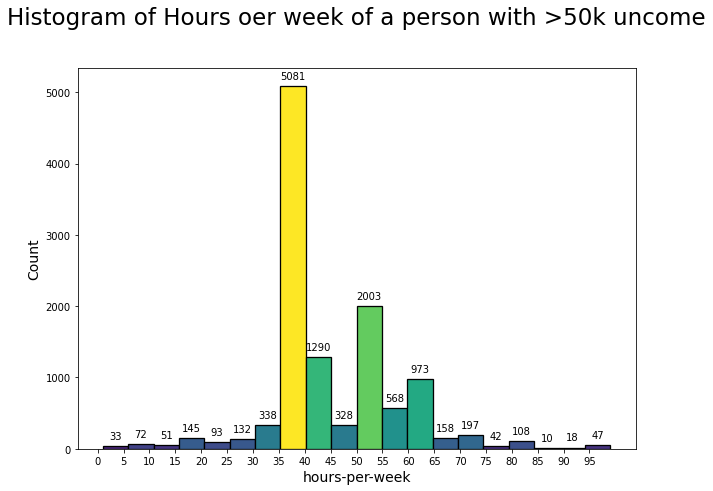




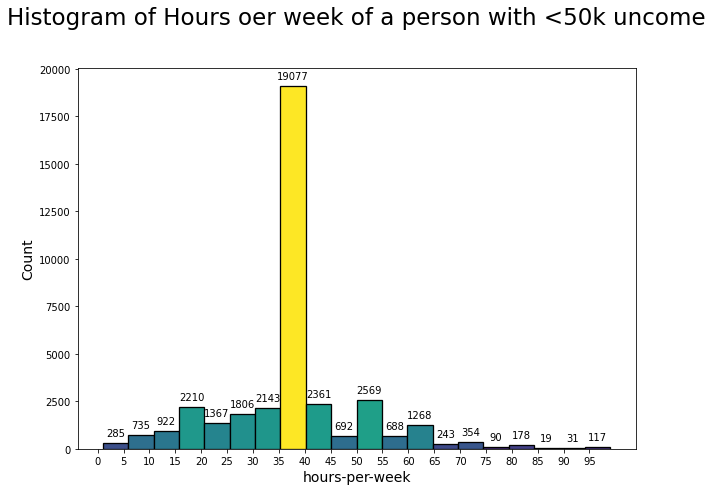


<div dir="rtl">
 ניתן לראות כי הנתונים אינם מתפלגים נורמלית , התוצאות שקיבלנו מאמתות זאת ,
</div>